# Tests

Here we test our modularized implementation + new integrator. They must be able to reconstruct dynamics and rediscover bifurcations.

1. Test train.py for Lorenz
3. Test train.py for 7d-glycolysis
4. Test the new integrator for 7-d glycolysis

In [1]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 1. Reconstructing Lorenz attractor

In [2]:
with open('lorenz.pkl', 'rb') as file:
    lorenz = pickle.load(file)
time_points = lorenz['t']
lorenz_pred = lorenz['pred']
lorenz_data = lorenz['data']

print("step size is ", time_points[1] - time_points[0])

step size is  0.01


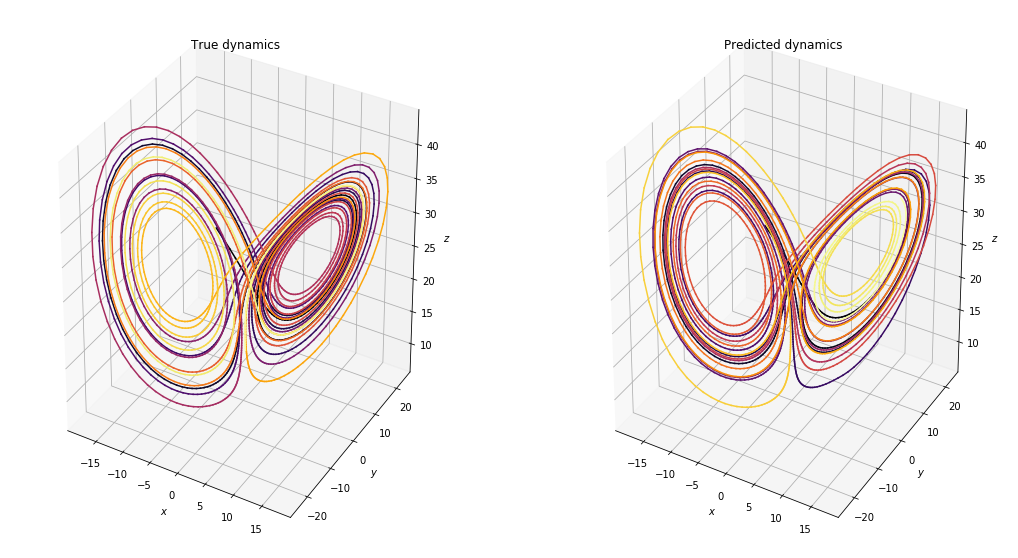

In [3]:
# plot phase portrait in 3-D projection

x = lorenz['data'][0,:,0]
y = lorenz['data'][0,:,1]
z = lorenz['data'][0,:,2]

fig = plt.figure(figsize=(18,10)) # twice as wide as it is tall
ax = fig.add_subplot(1, 2, 1, projection='3d')

for i in range(0, len(x)):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.inferno(int(255*i/len(x))))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('True dynamics', fontsize = 12, loc='center', pad=2.0)

x = lorenz['pred'][:,0]
y = lorenz['pred'][:,1]
z = lorenz['pred'][:,2]

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(0, len(x)):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=plt.cm.inferno(int(255*i/len(x))))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Predicted dynamics', fontsize = 12, loc='center', pad=2.0)
plt.show()

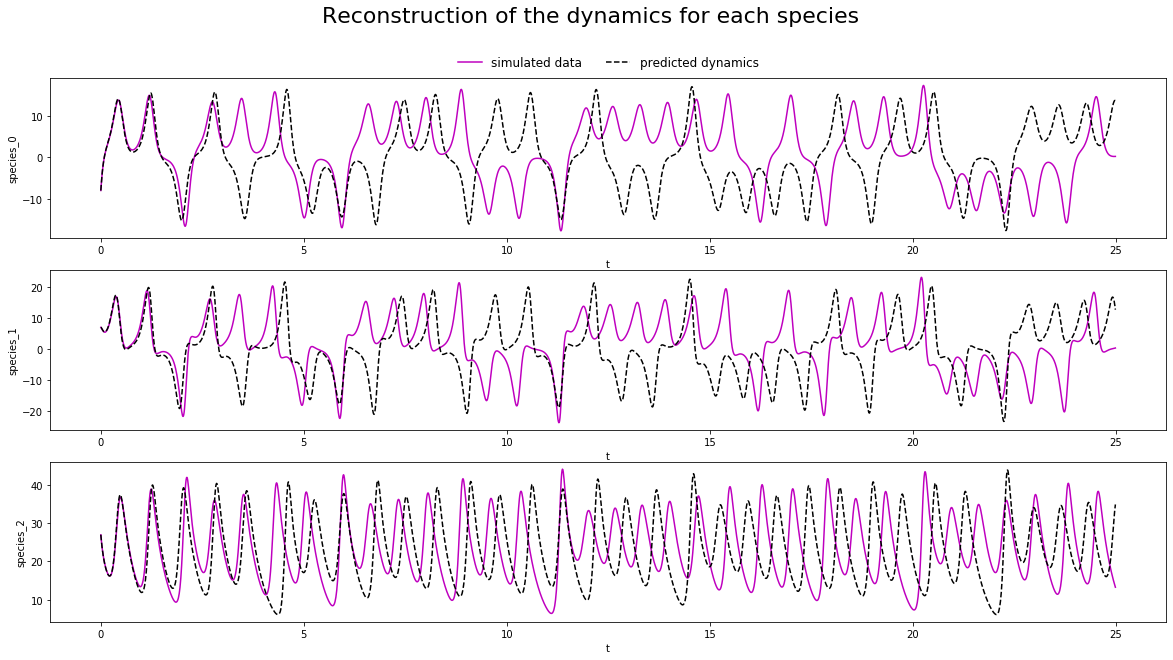

In [4]:
plt.figure(figsize=(20, 10))
plt.suptitle("Reconstruction of the dynamics for each species", fontsize=22)

# plot the dynamics with time
for species in range(3):
    plt.subplot(3, 1, species + 1)
    plt.plot(time_points, lorenz['data'][0,:,species], 'm-', label='simulated data')
    plt.plot(time_points, lorenz['pred'][:,species], 'k--', label='predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('species_' + str(species))

plt.legend(loc='center', bbox_to_anchor=(0.5, 3.5), ncol=2, fontsize=12, frameon=False)
plt.show()

## 2. Reconstructing 7-d glycolysis

Note: here LSODA is used as the integrator.

In [13]:
with open('ruoff.pkl', 'rb') as file:
    ruoff = pickle.load(file)
time_points = ruoff['t']
ruoff_pred = ruoff['pred']
ruoff_data = ruoff['data'].reshape(-1, 7)

print("step size is ", time_points[1] - time_points[0])

step size is  0.01


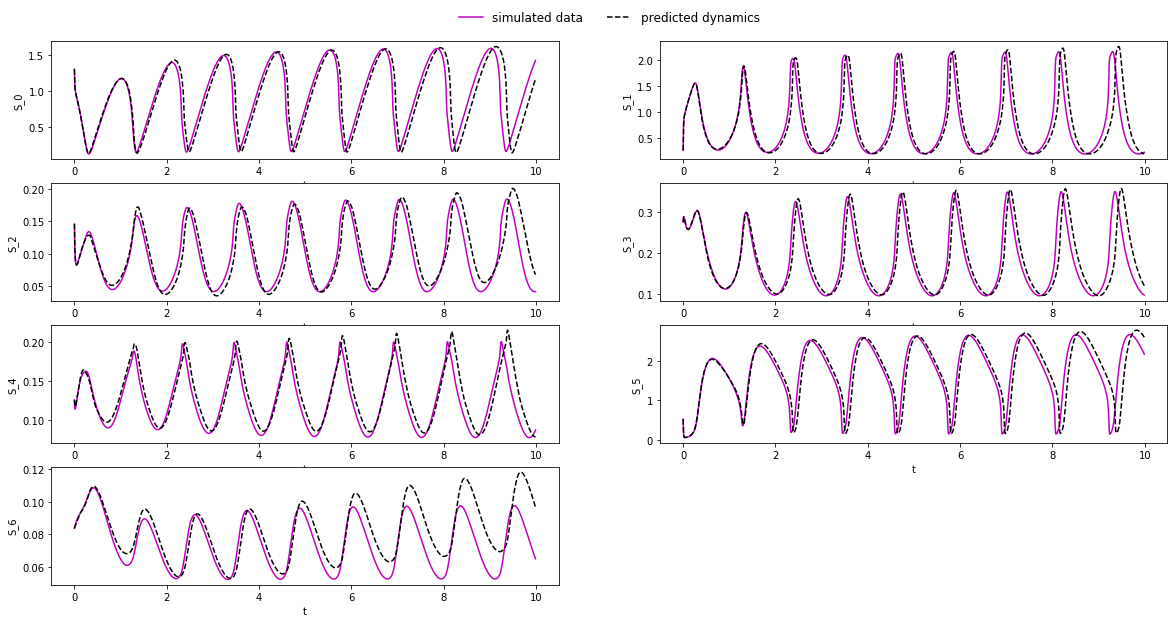

In [14]:
plt.figure(figsize=(20, 10))
for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, ruoff_data[:,species], 'm-', label = 'simulated data')
    plt.plot(time_points, ruoff_pred[:,species], 'k--', label = 'predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    
plt.legend(loc='center', bbox_to_anchor=(1.1, 4.8), ncol=2, fontsize=12, frameon=False)
plt.show()

## 3. Test the new integrator for glycolysis

The new integrator 
Note: here RK45 is used.

In [15]:
with open('ruoff.pkl', 'rb') as file:
    ruoff = pickle.load(file)
time_points = ruoff['t']
ruoff_pred = ruoff['pred']
ruoff_data = ruoff['data'].reshape(-1, 7)

print("step size is ", time_points[1] - time_points[0])

step size is  0.01


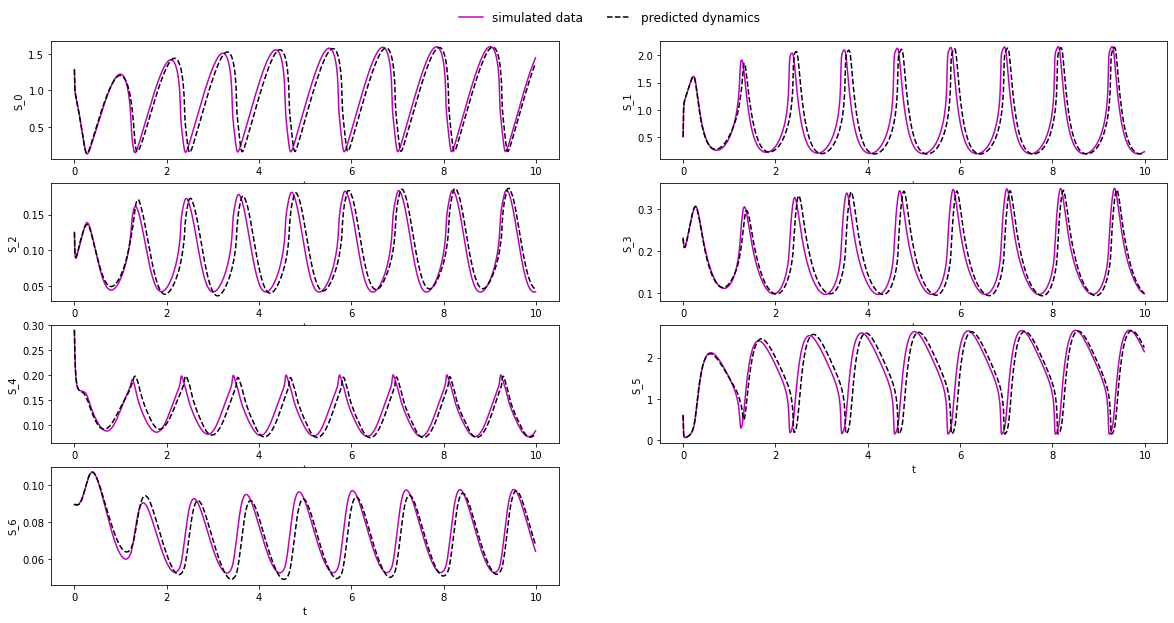

In [16]:
plt.figure(figsize=(20, 10))
for species in range(7):
    plt.subplot(4,2,species + 1)
    plt.plot(time_points, ruoff_data[:,species], 'm-', label = 'simulated data')
    plt.plot(time_points, ruoff_pred[:,species], 'k--', label = 'predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    
plt.legend(loc='center', bbox_to_anchor=(1.1, 4.8), ncol=2, fontsize=12, frameon=False)
plt.show()